In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

interactions = pd.read_csv('data/interactions_train.csv')
interactions['t'] = pd.to_datetime(interactions['t'], unit='s')

items = pd.read_csv('data/items.csv')
n_users = interactions.u.nunique()
n_items = items.i.nunique()

In [ ]:
# Cosine similarity between users
user_similarity = cosine_similarity(data_matrix)
print(user_similarity)

def user_based_predict(interactions, similarity, epsilon=1e-9):
    """
    Predicts user-item interactions based on user-user similarity.
    Parameters:
        interactions (numpy array): The user-item interaction matrix.
        similarity (numpy array): The user-user similarity matrix.
        epsilon (float): Small constant added to the denominator to avoid division by zero.
    Returns:
        numpy array: The predicted interaction scores for each user-item pair.
    """
    # Calculate the weighted sum of interactions based on user similarity
    pred = similarity.dot(interactions) / (np.abs(similarity).sum(axis=1)[:, np.newaxis] + epsilon)
    return pred

# Calculate the user-based predictions for positive interactions
user_prediction = user_based_predict(data_matrix, user_similarity)

# Extract the 10 recommended items for all users, and separate them by a space
top_10_recs = user_prediction.argsort(axis=1)[:, -10:]

top_10_recs_str = [' '.join(map(str, recs)) for recs in top_10_recs]
print(top_10_recs_str[0])

: 

In [68]:
interactions[interactions['u'] == 1].sort_values('i', ascending=True)

,u,i,t
48868,1,29,2023-02-16 16:21:09
33214,1,30,2023-03-03 11:48:06
70235,1,31,2023-04-13 15:08:42
73623,1,32,2023-04-20 15:46:35
35131,1,33,2023-05-04 15:23:09
63350,1,34,2023-05-25 15:31:11
2179,1,35,2023-05-25 16:44:09
52990,1,36,2023-08-09 13:34:31
69369,1,36,2023-08-09 13:34:35
71072,1,36,2023-08-09 13:34:39


In [70]:
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission.iloc[0]['recommendation']

'3758 11248 9088 9895 5101 6074 9295 14050 10961 8240'

In [71]:
sample_submission

,user_id,recommendation
0,0,3758 11248 9088 9895 5101 6074 9295 14050 1096...
1,1,3263 726 1589 14911 6432 10897 6484 7961 8249 ...
2,2,13508 9848 12244 2742 11120 2893 2461 5439 116...
3,3,2821 10734 6357 5934 2085 12608 12539 10551 10...
4,4,12425 219 11602 1487 14178 489 13888 2110 4413...
...,...,...
7833,7833,3915 10372 1921 6260 12503 6047 10331 11549 14...
7834,7834,2136 12498 10439 7427 5788 129 12770 2928 8122...
7835,7835,8540 2441 5690 12085 9514 1447 2355 2761 13437...
7836,7836,10948 11251 850 5048 6032 10357 6566 4402 7154...


In [72]:
top_10_recs_str

['9 5 8 14 11 15 23 12 4 13',
 '29 33 32 37 36 34 31 30 39 38',
 '71 45 87 64 91 53 56 49 58 46',
 '165 139 40 143 133 128 167 163 169 149',
 '201 199 191 193 202 195 205 207 198 203',
 '224 215 221 220 218 212 219 217 222 216',
 '9826 6070 3859 10867 13950 3862 229 232 231 230',
 '249 242 250 239 240 238 243 244 248 241',
 '9131 8027 14986 14483 6094 5920 14887 256 258 257',
 '275 1263 4023 1556 11063 4381 262 261 264 263',
 '15058 13231 2865 270 272 273 269 271 268 274',
 '6345 11237 5997 3821 4255 7369 278 280 279 277',
 '290 285 284 293 282 292 294 286 133 287',
 '318 330 304 312 311 331 328 324 336 323',
 '317 341 349 345 339 347 348 342 350 344',
 '15141 7662 13023 13551 6744 5288 704 355 356 354',
 '14333 15094 1532 2614 2820 2742 15258 361 359 360',
 '2130 2958 2141 618 11916 12829 14981 364 365 363',
 '4806 1648 10896 7808 5140 13198 6218 5851 367 368',
 '370 384 381 374 380 378 379 386 385 383',
 '401 402 398 400 397 393 396 395 394 399',
 '1532 3465 12426 1535 2742 1323 2820

In [73]:
recs = pd.DataFrame(range(n_users), columns=['user_id']).assign(recommendation=top_10_recs_str)
recs


,user_id,recommendation
0,0,9 5 8 14 11 15 23 12 4 13
1,1,29 33 32 37 36 34 31 30 39 38
2,2,71 45 87 64 91 53 56 49 58 46
3,3,165 139 40 143 133 128 167 163 169 149
4,4,201 199 191 193 202 195 205 207 198 203
...,...,...
7833,7833,5838 667 9610 8086 1130 611 7306 7322 975 7760
7834,7834,3019 10651 2125 101 3055 15276 8999 7128 13891...
7835,7835,15061 1367 53 9719 8999 8369 11126 4820 6791 3055
7836,7836,3469 14557 618 8999 3470 15065 611 14552 14550...


In [74]:
recs.to_csv('user_based2.csv', index=False)

In [91]:
len(responses['embedding'][1])

768

In [109]:
items.fillna('', inplace=True)

items['to_embed_0'] = items['Title']
items['to_embed_1'] = items['Title'] + ' ' + items['Author']
items['to_embed_2'] = items['Subjects']
items['to_embed_3'] = items['Title'] + ' ' + items['Author'] + ' ' + items['Subjects']

In [ ]:
items['ISBN_1'] = items['ISBN Valid'].str.split(';').str[0]
items['ISBN_list'] = items['ISBN Valid'].str.split(';').tolist()

In [ ]:
# Calculate the token lengths for each column
token_lengths = items[['to_embed_0', 'to_embed_1', 'to_embed_2', 'to_embed_3']].apply(lambda x: len(x.split()))

# Calculate the average and total token lengths for each column
average_token_lengths = token_lengths.mean()
total_token_lengths = token_lengths.sum()

# Display the results
print("Average token lengths:")
print(average_token_lengths)
print("\nTotal token lengths:")
print(total_token_lengths)

Average token lengths:
to_embed_0     8.670394
to_embed_1    10.721666
to_embed_2     7.317115
to_embed_3    18.038781
dtype: float64

Total token lengths:
to_embed_0    132579
to_embed_1    163945
to_embed_2    111886
to_embed_3    275831
dtype: int64


/var/folders/t8/crqx384x59sbfjcs2flq1d380000gn/T/ipykernel_7569/2403332666.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  token_lengths = items[['to_embed_0', 'to_embed_1', 'to_embed_2', 'to_embed_3']].applymap(lambda x: len(x.split()))


In [112]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Create an item-item similarity matrix
item_similarity = cosine_similarity(data_matrix.T)

def item_based_predict(interactions, similarity, epsilon=1e-9):
    """
    Predicts user-item interactions based on item-item similarity.
    Parameters:
        interactions (numpy array): The user-item interaction matrix.
        similarity (numpy array): The item-item similarity matrix.
        epsilon (float): Small constant added to the denominator to avoid division by zero.
    Returns:
        numpy array: The predicted interaction scores for each user-item pair.
    """
    # Calculate the weighted sum of interactions based on item similarity
    pred = interactions.dot(similarity) / (np.abs(similarity).sum(axis=1) + epsilon)
    return pred

# Calculate the item-based predictions
item_prediction = item_based_predict(data_matrix, item_similarity)

# Extract the top 10 recommended items for each user
top_10_item_recs = item_prediction.argsort(axis=1)[:, -10:]

# Convert the recommendations to a readable format
top_10_item_recs_str = [' '.join(map(str, recs)) for recs in top_10_item_recs]
print(top_10_item_recs_str[0])  # Example: Print recommendations for the first user

11 6 7 17 0 20 2 21 24 1


In [114]:
recs = pd.DataFrame(range(n_users), columns=['user_id']).assign(recommendation=top_10_item_recs_str)
recs.to_csv('item_based_am.csv', index=False)


In [ ]:
# TODO: WIP
import requests

def search_google_books(isbn):
    params = {
        'q': f'isbn:{isbn}',
        'maxResults': 1,
        'printType': 'books',
        'projection': 'full',
        #'key': 'YOUR_API_KEY'  # optional
    }
    response = requests.get('https://www.googleapis.com/books/v1/volumes', params=params)
    book = response.json()
    if 'items' not in book:
        return {}
    return book['items'][0]['volumeInfo']

book = search_google_books("9782365350020")
print(book['title'])

#print(book['description'])
#print(book['imageLinks']['thumbnail'])

{'kind': 'books#volumes', 'totalItems': 1000000, 'items': [{'kind': 'books#volume', 'id': 'DN-AMAEACAAJ', 'etag': 'gD8RXU4PNIc', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/DN-AMAEACAAJ', 'volumeInfo': {'title': "Ce livre devrait me permettre de résoudre le conflit au Proche-Orient, d'avoir m", 'authors': ['Sylvain Mazas'], 'publisher': 'Vraoum !', 'publishedDate': '2012-06-07', 'industryIdentifiers': [{'type': 'ISBN_10', 'identifier': '236535002X'}, {'type': 'ISBN_13', 'identifier': '9782365350020'}], 'readingModes': {'text': False, 'image': False}, 'pageCount': 200, 'printType': 'BOOK', 'maturityRating': 'NOT_MATURE', 'allowAnonLogging': False, 'contentVersion': 'preview-1.0.0', 'language': 'fr', 'previewLink': 'http://books.google.ch/books?id=DN-AMAEACAAJ&dq=isbn:9782365350020&hl=&as_pt=BOOKS&cd=1&source=gbs_api', 'infoLink': 'http://books.google.ch/books?id=DN-AMAEACAAJ&dq=isbn:9782365350020&hl=&as_pt=BOOKS&source=gbs_api', 'canonicalVolumeLink': 'https://books.google.

In [ ]:
#book_info_series = items['ISBN_1'].apply(search_google_books)
# need to do in batches

KeyboardInterrupt: 

In [ ]:
book_info_series = items['ISBN_1'].apply(search_google_books)
# 
def enrich_book_info(book_info_series):
    """
    Enriches book information for a given list of ISBNs by fetching data from Google Books API.

    Parameters:
        isbn_list (pd.Series): A pandas Series containing ISBNs.

    Returns:
        pd.DataFrame: A DataFrame with enriched book information.
    """
    # Iterate through the fetched book information and update the items DataFrame
    for idx, book_info in book_info_series.items():
        if isinstance(book_info, dict):
            # Extract title and subtitle, concatenate them
            title = book_info.get('title', '')
            subtitle = book_info.get('subtitle', '')
            full_title = f"{title}: {subtitle}".strip()

            # Update the Title column if it's empty or NaN
            if pd.isna(items.loc[idx, 'Title']) or items.loc[idx, 'Title'] == "":
                items.loc[idx, 'Title'] = full_title

            # Extract authors and update the Author column
            authors = ', '.join(book_info.get('authors', []))
            if pd.isna(items.loc[idx, 'Author']) or items.loc[idx, 'Author'] == "":
                items.loc[idx, 'Author'] = authors

            # Extract language and add a new column if it doesn't exist
            language = book_info.get('language', '')
            if 'Language' not in items.columns:
                items['Language'] = ""
            items.loc[idx, 'Language'] = language

            # Extract canonicalVolumeLink and add a new column if it doesn't exist
            canonical_link = book_info.get('canonicalVolumeLink', '')
            if 'CanonicalVolumeLink' not in items.columns:
                items['CanonicalVolumeLink'] = ""
            items.loc[idx, 'CanonicalVolumeLink'] = canonical_link

            # Extract publishedDate and add a new column if it doesn't exist
            published_date = book_info.get('publishedDate', '')[:4]
            if 'PublishedDate' not in items.columns:
                items['PublishedDate'] = ""
            items.loc[idx, 'PublishedDate'] = published_date

            # Extract description and add a new column if it doesn't exist
            description = book_info.get('description', '')
            if 'Description' not in items.columns:
                items['Description'] = ""
            items.loc[idx, 'Description'] = description

            # Extract imageLinks and add a new column if it doesn't exist
            image_link = book_info.get('imageLinks', {}).get('thumbnail', '')
            if 'ImageLink' not in items.columns:
                items['ImageLink'] = ""
            items.loc[idx, 'ImageLink'] = image_link

# Apply the function to the first 10 ISBNs in the items DataFrame
enrich_book_info(items['ISBN_1'])


KeyboardInterrupt: 

In [ ]:
def show_recommendations(recommendations, model_name="best model"):
    """
    Displays the movie posters for the top-10 recommended movies.
    
    Parameters:
    - recommendations: List or array of recommended movie IDs.
    - model_name: Name of the recommendation model (e.g., "User-to-User CF" or "Item-to-Item CF").
    """
    fig, axes = plt.subplots(1, 10, figsize=(20, 5))
    fig.suptitle(f"Test-{model_name}", fontsize=16)

    for i, isbn in enumerate(recommendations):
    # Step 1: Removed, see lab

    # Step 2: Fetch the poster URL using the `fetch_poster` function
    # - Pass `tmdb_id[0]` to `fetch_poster` and store the result in `poster_url`
        book = search_google_books(f"{isbn}")
        print(book['title'])
        #print(book['description'])
        #print(book['imageLinks']['thumbnail'])

        poster_url = book.get('imageLinks', {}).get('thumbnail', None)
        
        # Step 3: Display the poster image if available
        # - If `poster_url` is valid, use `requests` to get the image and display it
        # - If `poster_url` is None, display "No Image" text in the placeholder
        if poster_url:
            response = requests.get(poster_url)
            img = Image.open(BytesIO(response.content))
            axes[i].imshow(img)
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, "No Image", ha='center', va='center')
            axes[i].axis('off')

In [ ]:
def show_recommendations(recommendations, model_name="best model"):
    """
    Displays the movie posters for the top-10 recommended movies.
    
    Parameters:
    - recommendations: List or array of recommended movie IDs.
    - model_name: Name of the recommendation model (e.g., "User-to-User CF" or "Item-to-Item CF").
    """
    fig, axes = plt.subplots(1, 10, figsize=(20, 5))
    fig.suptitle(f"Test-{model_name}", fontsize=16)

    for i, movie_id in enumerate(recommendations):
    # Step 1: Removed, see lab

    # Step 2: Extract the poster URL 

        poster_url = items.loc[movie_id]['ImageLink']
        
        # Step 3: Display the poster image if available
        # - If `poster_url` is valid, use `requests` to get the image and display it
        # - If `poster_url` is None, display "No Image" text in the placeholder
        if poster_url != "":
            response = requests.get(poster_url)
            img = Image.open(BytesIO(response.content))
            axes[i].imshow(img)
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, "No Image", ha='center', va='center')
            axes[i].axis('off')

Aveuglément
Ombres et lumière
La petite boutique aux poisons
L'architecture religieuse en Suisse romande et dans l'ancien diocèse de Genève à la fin de l'époque gothique
Guide des milieux naturels de Suisse
Métier d'élève et sens du travail scolaire
50 nuances de Grecs
Que puis-je faire pour vous ?
Dès que sa bouche fut pleine
Übersicht über meine 41 ISBN-Büchern


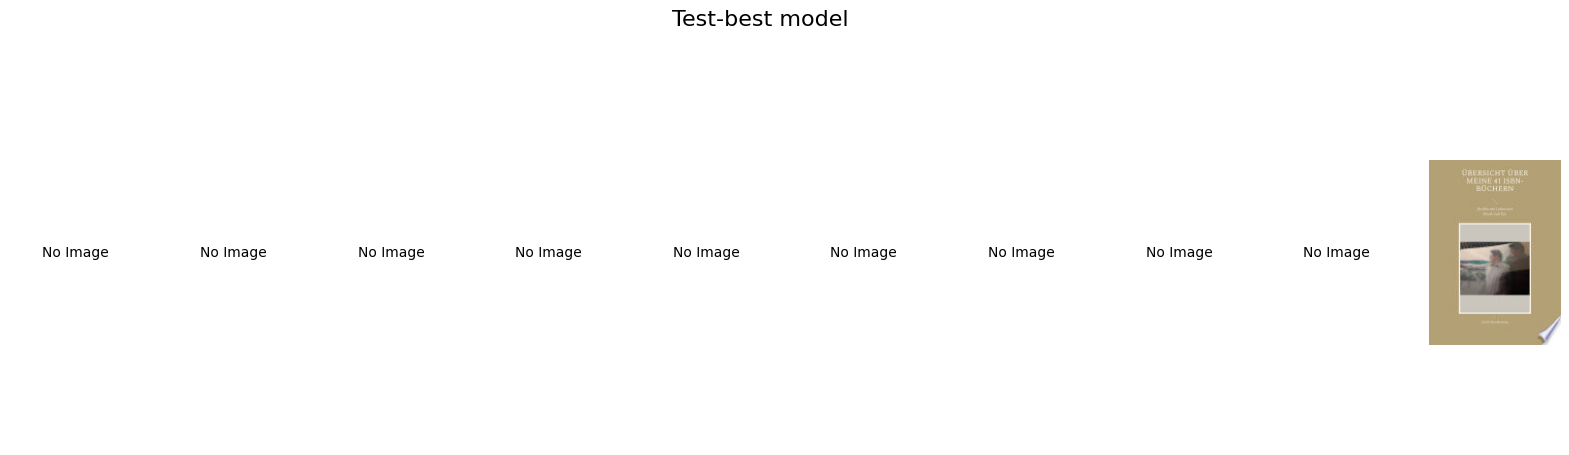

In [177]:
test_recommendations = items.sample(10, random_state=0)['ISBN_1']
show_recommendations(test_recommendations)

In [4]:
import pandas as pd
selected_customer = 0
def load_books_data():
    df = pd.read_csv("items_enhanced_final.csv")
    return df
df_books = load_books_data()
def load_recommendations():
    df = pd.read_csv("sample_recommendations.csv")
    return df.set_index("user_id")["recommendations"].to_dict()
recommendations_dict = load_recommendations()
def load_interactions_data():
    df = pd.read_csv("data/interactions_train.csv")
    return df
interactions = load_interactions_data
recommended_ids = recommendations_dict.get(selected_customer, "").split(" ")
df_books["i"] = df_books["i"].astype(str)
recommended_books = df_books[df_books["i"].isin(recommended_ids)]
recommended_books.iloc[1]

Unnamed: 0                                                       3513
CanonicalLink       https://books.google.com/books/about/Les_aspec...
Description                                                       NaN
ISBN                                                    9783725586998
ImageLink           https://images.isbndb.com/covers/1773213482926...
Language                                                           fr
PublishedDate                                              2022-11-03
Publisher                                      Schulthess éd romandes
Subjects            Droit du travail (droit international); Droit ...
Title                Les aspects internationaux du droit du travail /
author_clean                        JeanPhilippe Dunand, Pascal Mahon
google_api_title       Les aspects internationaux du droit du travail
i                                                                2870
title_clean            Les aspects internationaux du droit du travail
Name: 2870, dtype: o

Unnamed: 0                                                       1352
CanonicalLink       https://books.google.com/books/about/Didactiqu...
Description         La didactique de la géographie a pour objet la...
ISBN                                                       2841332187
ImageLink           https://images.isbndb.com/covers/1104579348319...
Language                                                           fr
PublishedDate                                              2020-02-27
Publisher           Institut universitaire de formation des maître...
Subjects                        didactique--géographie - enseignement
Title                                   Didactique de la géographie /
author_clean                                            Le Roux, Anne
google_api_title                          Didactique de la géographie
i                                                                 639
title_clean                               Didactique de la géographie
Name: 639, dtype: ob

In [ ]:


def show_recommendations(recommendations, model_name="best model"):
    """
    Displays the movie posters for the top-10 recommended movies.
    
    Parameters:
    - recommendations: List or array of recommended movie IDs.
    - model_name: Name of the recommendation model (e.g., "User-to-User CF" or "Item-to-Item CF").
    """
    fig, axes = plt.subplots(1, 10, figsize=(20, 5))
    fig.suptitle(f"Test-{model_name}", fontsize=16)

    for i, movie_id in enumerate(recommendations):
    # Step 1: Removed, see lab

    # Step 2: Extract the poster URL 

        poster_url = items.loc[movie_id]['ImageLink']
        
        # Step 3: Display the poster image if available
        # - If `poster_url` is valid, use `requests` to get the image and display it
        # - If `poster_url` is None, display "No Image" text in the placeholder
        if poster_url != "":
            response = requests.get(poster_url)
            img = Image.open(BytesIO(response.content))
            axes[i].imshow(img)
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, "No Image", ha='center', va='center')
            axes[i].axis('off')

            img_url = book["ImageLink"]
            canonical_link = book["CanonicalLink"]

In [15]:
nan_books = pd.read_csv('nan_books_enhanced.csv')
nan_books

,Author,CanonicalLink,Description,ISBN,ISBN Valid,ImageLink,Language,PublishedDate,Publisher,Subjects,Title,google_api_title,i
0,"Seneca, Lucius Annaeus, l'Ancien",https://play.google.com/store/books/details?id...,NaN,NaN,NaN,http://books.google.com/books/content?id=m5qZA...,fr,1932,Garnier frères,NaN,Controverses ; et Suasoires /,Controverses ; et Suasoires,261
1,"Seneca, Lucius Annaeus, l'Ancien",https://play.google.com/store/books/details?id...,NaN,NaN,NaN,http://books.google.com/books/content?id=m5qZA...,fr,1932,Garnier,NaN,Controverses ; et Suasoires /,Controverses ; et Suasoires,264
2,"Baudelaire, Charles",https://books.google.com/books/about/Oeuvres_P...,NaN,2070108295,NaN,NaN,fr,1990,puis Gallimard; La Pléiade,NaN,"Oeuvres / Poésies de jeunesse, poésies diverse...","Oeuvres / Poésies de jeunesse, poésies diverse...",269
3,"Quercy, Pierre",https://books.google.com/books/about/L_halluci...,L'Hallucination artistique (la formule est de ...,2952930295,NaN,NaN,fr,2012,F Alcan,Art and literature,L'hallucination /,L'hallucination,367
4,"Wieland, Karl, 1864-1936",https://books.google.com/books/about/Les_droit...,NaN,NaN,NaN,http://books.google.com/books/content?id=yo7dw...,fr,1914,M Giard et E Brière,droits réels--* droit civil--Suisse; Sachenrec...,Les droits réels dans le Code civil suisse /,Les droits réels dans le Code civil suisse,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,"Paul Logoz, Yves Sandoz",https://books.google.com/books/about/Commentai...,Cet ouvrage est une réédition numérique d’un l...,9791036919473,NaN,http://books.google.com/books/content?id=ebf_E...,fr,1976-01-01T00:00:00+01:00,diff OFCL; Chancellerie fédérale,Strafrecht; Strafgesetzbuch; Droit pénal; Schw...,Code pénal suisse : [du 21 décembre 1937 (état...,Code pénal suisse,15195
719,"Scriblerus, Talia Felix, John Davidson, Lawren...",https://books.google.com/books/about/La_Commed...,The Commedia dell'Arte is best known through t...,9781453697481,NaN,http://books.google.com/books/content?id=_em-q...,en,2010-08-02,Sansoni Antiquariato,commedia dell'arte--[anthologie],La Commedia dell'Arte : storia e testo /,La Commedia dell'Arte,15203
720,NaN,https://books.google.com/books/about/Payerne_v...,NaN,NaN,NaN,NaN,fr,2015,Editions du Caïon rodze,NaN,"Payerne vracs : [ville, rues, archives, campag...",Payerne vracs,15232
721,"Chekhov, Anton Pavlovich",https://books.google.com/books/about/Polnoe_so...,NaN,NaN,NaN,NaN,ru,1971,Nauka,NaN,Polnoe sobranie sochineniĭ i pisem : v tridt︠s...,Polnoe sobranie sochineniĭ i pisem,15245


In [18]:
items_embeddings = pd.read_csv('embeddings_part1.csv').columns
items_embeddings

Index(['Title', 'Author', 'ISBN Valid', 'Publisher', 'Subjects', 'i', 'ISBN',
       'google_api_title', 'author_clean', 'embedded_title'],
      dtype='object')

In [39]:
# same as in data enhancing code, nice to have it all together
items = pd.read_csv('data/items.csv')
items['ISBN'] = items['ISBN Valid'].str.split(';').str[0]
items['google_api_title'] = items['Title'].apply(lambda x: x.rstrip(' /') if isinstance(x, str) else np.nan)
items['google_api_title'] = items['google_api_title'].str.split(' :').str[0]
(items['google_api_title'].isna().sum())
# No missing data for titles, therefore the title embedding is unaffected by data enhancing methods
def get_clean_author(author_series):
    def clean_single_author(author):
        if pd.isna(author):
            return None
        # Step 1: Remove content in parentheses
        author = re.sub(r'\s*\([^)]*\)', '', author)
        # Step 2: Split by comma and clean whitespace
        parts = [part.strip() for part in author.split(',')]
        # Step 3: Filter out parts with digits
        parts = [part for part in parts if not any(char.isdigit() for char in part)]
        # Step 4: Group every two elements into "First Last"
        grouped = [f"{parts[i]} {parts[i+1]}" for i in range(0, len(parts)-1, 2)]
        return ', '.join(grouped) if grouped else None

    return author_series.apply(clean_single_author)

items['author_clean'] = get_clean_author(items['Author'])
items.set_index('i', inplace=True)

In [ ]:
items.set_index('i', inplace=True)
nan_books.set_index('i',inplace=True)
items['ISBN'] = items['ISBN'].combine_first(nan_books['ISBN'])

KeyError: "None of ['i'] are in the columns"

In [41]:
items['ISBN'] = items['ISBN'].combine_first(nan_books['ISBN'])

In [30]:
import pandas as pd
import requests
import time
import re
from tqdm import tqdm
from config import GOOGLE_API_KEY
from config import ISBNDB_API_KEY

API_URL = 'https://api2.isbndb.com/books'
HEADERS = {
    'Authorization': ISBNDB_API_KEY,
    'accept': 'application/json',
    'Content-Type': 'application/json',
}
BATCH_SIZE = 100
API_SLEEP = 1  # seconds


# === PREPARE UNIQUE ISBNs ===
unique_isbns = items['ISBN'].dropna().drop_duplicates().tolist()
isbn_batches = [unique_isbns[i:i + BATCH_SIZE] for i in range(0, len(unique_isbns), BATCH_SIZE)]

# === FETCH BOOK DATA ===
book_data = []

for batch in tqdm(isbn_batches, desc="Fetching ISBNs", unit="batch"):
    try:
        payload_str = 'isbns=' + ','.join(batch)
        response = requests.post(API_URL, headers=HEADERS, data=payload_str)

        if response.status_code == 200:
            books = response.json().get('data', [])
            book_data.extend(books)
    except Exception:
        pass
    time.sleep(API_SLEEP)

Fetching ISBNs: 100%|██████████| 149/149 [04:35<00:00,  1.85s/batch]


In [33]:
len(book_data)

13920

In [46]:
books_df = pd.DataFrame(book_data)
print(books_df.columns)
a = items.merge(books_df, right_on = 'isbn10', left_on = "ISBN",how = 'left')
b = items.merge(books_df, right_on = 'isbn13', left_on = "ISBN",how = 'left')
print(len(a),len(b))

Index(['publisher', 'synopsis', 'language', 'image', 'image_original',
       'title_long', 'dimensions', 'dimensions_structured', 'pages',
       'date_published', 'subjects', 'authors', 'title', 'isbn13', 'msrp',
       'binding', 'isbn', 'isbn10', 'edition', 'related', 'dewey_decimal'],
      dtype='object')
233563 15331


In [62]:
books_df.columns
books_df.drop(columns=['dimensions', 'dimensions_structured', 'pages','edition', 'related', 'dewey_decimal','binding','msrp','title_long'], inplace = True)
books_df.to_csv('isbn_enhanced.csv', index=False)

In [58]:
sum(books_df['title'] == books_df['title_long'])

13873

In [64]:
pd.read_csv('isbn_enhanced.csv')

,publisher,synopsis,language,image,image_original,date_published,subjects,authors,title,isbn13,isbn,isbn10
0,QUE SAIS JE,L'exigence de justice et les réactions à l'inj...,fr,https://images.isbndb.com/covers/1493121348294...,https://images.isbndb.com/covers/original/1493...,1998-11-01,['Subjects'],['Jean Kellerhals'],Le sentiment de justice dans les relations soc...,9782130486855,2130486851,2130486851
1,KLOG,Le terme « merchandising » désigne l’ensemble ...,fr,https://images.isbndb.com/covers/1103083348613...,https://images.isbndb.com/covers/original/1103...,2022-01-04,"['Education & Teaching', 'Studying & Workbooks...",['Nicolas Beudon'],Le merchandising en bibliothèque: Le design de...,9791092272406,9791092272406,NaN
2,PAYOT,Product Description<br/><br/>Un roman graphiqu...,fr,https://images.isbndb.com/covers/1635098348298...,https://images.isbndb.com/covers/original/1635...,2021-09-29,"['Literature & Fiction', 'Genre Fiction']",['Elodie Font'],Coming in,9782228929097,2228929093,2228929093
3,LEZARD NOIR,NaN,fr,https://images.isbndb.com/covers/2611313348302...,https://images.isbndb.com/covers/original/2611...,2023-03-08,"['Comics & Graphic Novels', 'Manga']",['KEIGO SHINZO'],HIRAYASUMI VOL.1,9782353482788,2353482783,2353482783
4,RACKHAM,Lors d’une conférence de presse après ses fian...,fr,https://images.isbndb.com/covers/2196232348321...,https://images.isbndb.com/covers/original/2196...,2016-05-10,['Subjects'],['Liv Stromquist'],Les Sentiments du Prince Charles,9782878271980,287827198X,287827198X
...,...,...,...,...,...,...,...,...,...,...,...,...
13916,LEZARD NOIR,Née des cendres de la mythique revue undergrou...,fr,https://images.isbndb.com/covers/2608636348302...,https://images.isbndb.com/covers/original/2608...,2009-11-13,"['Comics & Graphic Novels', 'Manga']",['Takashi FUKUTANI'],Le vagabond de Tokyo 1 - residence dokudami,9782353480111,235348011X,235348011X
13917,PIKA,"Coupe du monde 2018, l’équipe de football du J...",fr,https://images.isbndb.com/covers/1718233483189...,https://images.isbndb.com/covers/original/1718...,2021-06-02,"['Comics & Graphic Novels', 'Manga', 'Shonen']",[],Blue Lock T01,9782811650254,2811650253,2811650253
13918,Larousse,Davantage état d'esprit que mouvement constitu...,fr,https://images.isbndb.com/covers/1553101348291...,https://images.isbndb.com/covers/original/1553...,1999-10-29,['Subjects'],['Gérard Legrand'],L'art romantique,9782035055149,2035055148,2035055148
13919,Everyman's Library,ONE OF TIME MAGAZINE'S 100 BEST MYSTERY AND TH...,en,https://images.isbndb.com/covers/8540503482580...,https://images.isbndb.com/covers/original/8540...,2017-02-07,"['Literature & Fiction', 'Genre Fiction', 'Got...",['Daphne du Maurier'],Rebecca: Introduction by Lucy Hughes-Hallett (...,9781101907870,1101907878,1101907878


In [3]:
# This is from the ISBN database
import pandas as pd
isbn_enhanced = pd.read_csv('isbn_enhanced.csv')

# Merge the enhanced ISBN data with the original 'items' dataset
items = items.merge(isbn_enhanced, left_on='ISBN', right_on='isbn13', how='left')

NameError: name 'items' is not defined

In [17]:
import pandas as pd
import random
t = pd.read_csv('items_enhanced_final.csv')

In [30]:
users = pd.read_csv('data/interactions_train.csv')
users

,u,i,t
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09
...,...,...,...
87042,924,8171,1.699284e+09
87043,1106,9009,1.699872e+09
87044,5207,13400,1.683627e+09
87045,698,5779,1.686667e+09


In [37]:
sample_rows = []
for user in users['u']:  # generate for the first 100 books (adjust as needed)
    # Choose 10 random titles that aren't the same as the base title
    recommendations = random.sample(list(t['i']), 10)
    rec_str = " ".join(str(r) for r in recommendations)
    sample_rows.append({"user_id": user, "recommendations": rec_str})

# Create DataFrame

In [39]:
pd.DataFrame(sample_rows).to_csv('sample_recommendations.csv', index = False)

In [35]:
pd.DataFrame(sample_rows)

,user_id,recommendations
0,4456,Introduction à la psychologie du développeme...
1,142,Histoire et combats : mouvement ouvrier et soc...
2,362,Le Troisième Reich dans l'historiographie alle...
3,1809,"L'esclavage des nègres, ou, L'heureux naufrage..."
4,4384,Travailler en réseau et en partenariat : comme...
...,...,...
87042,924,Sois ce que tu es Max décide de faire des effo...
87043,1106,Les animaux dans l'histoire Macramé super faci...
87044,5207,Aliénation et accélération : vers une théo...
87045,698,Sex and gender in the ancient Near East : proc...


In [43]:
def load_books_data():
    df = pd.read_csv("items_enhanced_final.csv")
    return df
df_books = load_books_data()
def load_recommendations():
    df = pd.read_csv("sample_recommendations.csv")
    return df.set_index("user_id")["recommendations"].to_dict()
recommendations_dict = load_recommendations()
def load_interactions_data():
    df = pd.read_csv("data/interactions_train.csv")
    return df
interactions = load_interactions_data

In [ ]:
read_books = (
        interactions[interactions["u"] == selected_customer]
        .sort_values(by="t", ascending=False)
        .head(5)
    )

read_books = read_books.merge(df_books, on = 'i', how = 'left')["title_clean"].tolist()

In [42]:
recommendations_dict

{4456: '6271 12771 827 814 12463 12220 8803 8409 8542 10146',
 142: '10591 1238 12389 1652 9701 3910 9680 14117 6134 14850',
 362: '3368 1287 8869 611 1860 10605 9117 10903 10243 13085',
 1809: '12323 1522 13272 13608 14122 3288 9285 7233 11803 5249',
 4384: '1185 494 8594 9664 3644 115 495 12210 1852 14496',
 2369: '3552 10227 10970 3067 10349 11568 3245 8500 7296 4371',
 259: '14471 3658 14764 5905 9484 1624 7550 2798 7920 1426',
 6239: '8569 14242 5805 2713 9332 6767 12434 8616 11846 6635',
 2744: '2226 4473 8403 5924 10982 508 10635 13836 8081 1911',
 6597: '9566 8463 6473 208 3768 14009 7755 14572 11166 4367',
 4648: '2930 3274 13232 13746 8971 97 9395 7461 4123 4069',
 1488: '13955 12781 10403 3976 2653 6259 65 14406 3454 12194',
 1849: '11410 3112 731 13635 4096 9282 3133 2191 2062 2971',
 2620: '757 12136 11993 10172 926 12252 9915 12433 13241 2498',
 7178: '4514 187 8174 12009 11648 4631 13616 13046 10461 3331',
 3148: '8425 2161 9572 8740 4272 6379 5478 8691 14291 4027',
 541

In [55]:
df_books["i"] = df_books["i"].astype(str)

selected_customer = 7
recommended_ids = recommendations_dict.get(selected_customer, "").split(" ")
recommended_ids
df_books[df_books['i'].isin(recommended_ids)]

,Unnamed: 0,CanonicalLink,Description,ISBN,ImageLink,Language,PublishedDate,Publisher,Subjects,Title,author_clean,google_api_title,i,title_clean
2764,3416,https://books.google.com/books/about/Le_Livre_...,"""Les mots ont le pouvoir qu'on leur donne"" [4e...",9782226476364,http://books.google.com/books/content?id=knsOz...,fr,NaN,Albin Michel,Relations entre soeurs; Roman belge de langue ...,Le livre des sœurs : roman /,"Nothomb, Amélie,",Le livre des sœurs,2764,Le livre des sœurs : roman
3718,4334,https://books.google.com/books/about/La_vie_es...,NaN,9782492926204,NaN,fr,NaN,SuperExemplaire,Bandes dessinées,La vie est une corvée /,"Lahoche, Salomé ....",La vie est une corvée,3718,La vie est une corvée
4470,5062,https://books.google.com/books/about/Le_temps_...,"""L'heure qu'il est, le temps qu'il fait, l'esp...",9782227496064,http://books.google.com/books/content?id=BL_zb...,fr,NaN,Bayard,Temps (philosophie),Le temps (qui passe?) /,"Klein, Etienne",Le temps (qui passe?),4470,Le temps (qui passe?)
6173,6710,https://books.google.com/books/about/Cent_ans_...,Analyse: Contient deux contributions concernan...,9782829001376,http://books.google.com/books/content?id=kId-B...,fr,NaN,Ed d'En Bas; Association pour l'étude de l'his...,Police--Aspect politique--Suisse--19e siècle; ...,Cent ans de police politique en Suisse : (1889...,Hans Ulrich Jost,Cent ans de police politique en Suisse,6173,Cent ans de police politique en Suisse : (1889...
9249,9621,https://books.google.com/books/about/L_affaire...,NaN,9782889730001,http://books.google.com/books/content?id=LqDtz...,fr,NaN,Rosie & Wolfe,Littérature suisse; Roman policier suisse; Rom...,L'affaire Alaska Sanders : roman /,"Dicker, Joël,",L'affaire Alaska Sanders,9249,L'affaire Alaska Sanders : roman
9812,10157,https://books.google.com/books/about/Maths_CE1...,NaN,9782369404149,NaN,fr,NaN,La Librairie des écoles,Mathématiques; Manuels d'enseignement primaire,Maths : La méthode de Singapour : CE1 : Fichie...,"Monica Neagoy, Agnès Szikora, Evelyne Touchard",Maths,9812,Maths : La méthode de Singapour : CE1 : Fichie...
10323,10649,https://books.google.com/books/about/Hotel_Pal...,Enth. u.a. einen knappen Überblick über die Be...,3906419681,http://books.google.com/books/content?id=NJRJA...,de,NaN,Hier + Jetzt Verl für Kultur und Geschichte,hôtel--Suisse--1830 / 1920; tourisme--Suisse--...,Hotelpaläste : zwischen Traum und Wirklichkeit...,"FlückigerSeiler, Roland,",Hotelpaläste,10323,Hotelpaläste : zwischen Traum und Wirklichkeit...
12395,12585,NaN,NaN,9791023000450,NaN,NaN,NaN,Ellébore,Gymnastique douce; Personnes âgées; [Guides pr...,La gym douce senior /,"Choque, Jacques",La gym douce senior,12395,La gym douce senior
12519,541,https://books.google.com/books/about/LA_GUERRE...,58 av JC. L'ensemble de la Gaule est divisé en...,9780244802745,http://books.google.com/books/content?id=Qm6jD...,fr,2019-07-18,Les Belles Lettres,Biography & Autobiography,Guerre des Gaules /,"Caesar, Caius Julius",Guerre des Gaules,12519,Guerre des Gaules
13582,13670,https://books.google.com/books/about/La_nature...,NaN,9782832109267,NaN,fr,NaN,Slatkine,Biologie humaine; Philosophie de l'homme; Vie ...,La nature en nous /,"Rosso, Lia,",La nature en nous,13582,La nature en nous


In [ ]:
recommended_ids = [rid for rid in recommended_ids if rid][:10]
recommended_ids

[2764, 10323, 6173, 9812, 9249, 3718, 12395, 4470, 12519, 13582]

In [ ]:
recommended_ids = list(map(int, recommended_ids))


,Unnamed: 0,CanonicalLink,Description,ISBN,ImageLink,Language,PublishedDate,Publisher,Subjects,Title,author_clean,google_api_title,i,title_clean
2764,3416,https://books.google.com/books/about/Le_Livre_...,"""Les mots ont le pouvoir qu'on leur donne"" [4e...",9782226476364,http://books.google.com/books/content?id=knsOz...,fr,NaN,Albin Michel,Relations entre soeurs; Roman belge de langue ...,Le livre des sœurs : roman /,"Nothomb, Amélie,",Le livre des sœurs,2764,Le livre des sœurs : roman
3718,4334,https://books.google.com/books/about/La_vie_es...,NaN,9782492926204,NaN,fr,NaN,SuperExemplaire,Bandes dessinées,La vie est une corvée /,"Lahoche, Salomé ....",La vie est une corvée,3718,La vie est une corvée
4470,5062,https://books.google.com/books/about/Le_temps_...,"""L'heure qu'il est, le temps qu'il fait, l'esp...",9782227496064,http://books.google.com/books/content?id=BL_zb...,fr,NaN,Bayard,Temps (philosophie),Le temps (qui passe?) /,"Klein, Etienne",Le temps (qui passe?),4470,Le temps (qui passe?)
6173,6710,https://books.google.com/books/about/Cent_ans_...,Analyse: Contient deux contributions concernan...,9782829001376,http://books.google.com/books/content?id=kId-B...,fr,NaN,Ed d'En Bas; Association pour l'étude de l'his...,Police--Aspect politique--Suisse--19e siècle; ...,Cent ans de police politique en Suisse : (1889...,Hans Ulrich Jost,Cent ans de police politique en Suisse,6173,Cent ans de police politique en Suisse : (1889...
9249,9621,https://books.google.com/books/about/L_affaire...,NaN,9782889730001,http://books.google.com/books/content?id=LqDtz...,fr,NaN,Rosie & Wolfe,Littérature suisse; Roman policier suisse; Rom...,L'affaire Alaska Sanders : roman /,"Dicker, Joël,",L'affaire Alaska Sanders,9249,L'affaire Alaska Sanders : roman
9812,10157,https://books.google.com/books/about/Maths_CE1...,NaN,9782369404149,NaN,fr,NaN,La Librairie des écoles,Mathématiques; Manuels d'enseignement primaire,Maths : La méthode de Singapour : CE1 : Fichie...,"Monica Neagoy, Agnès Szikora, Evelyne Touchard",Maths,9812,Maths : La méthode de Singapour : CE1 : Fichie...
10323,10649,https://books.google.com/books/about/Hotel_Pal...,Enth. u.a. einen knappen Überblick über die Be...,3906419681,http://books.google.com/books/content?id=NJRJA...,de,NaN,Hier + Jetzt Verl für Kultur und Geschichte,hôtel--Suisse--1830 / 1920; tourisme--Suisse--...,Hotelpaläste : zwischen Traum und Wirklichkeit...,"FlückigerSeiler, Roland,",Hotelpaläste,10323,Hotelpaläste : zwischen Traum und Wirklichkeit...
12395,12585,NaN,NaN,9791023000450,NaN,NaN,NaN,Ellébore,Gymnastique douce; Personnes âgées; [Guides pr...,La gym douce senior /,"Choque, Jacques",La gym douce senior,12395,La gym douce senior
12519,541,https://books.google.com/books/about/LA_GUERRE...,58 av JC. L'ensemble de la Gaule est divisé en...,9780244802745,http://books.google.com/books/content?id=Qm6jD...,fr,2019-07-18,Les Belles Lettres,Biography & Autobiography,Guerre des Gaules /,"Caesar, Caius Julius",Guerre des Gaules,12519,Guerre des Gaules
13582,13670,https://books.google.com/books/about/La_nature...,NaN,9782832109267,NaN,fr,NaN,Slatkine,Biologie humaine; Philosophie de l'homme; Vie ...,La nature en nous /,"Rosso, Lia,",La nature en nous,13582,La nature en nous


In [ ]:

recommended_books = df_books[df_books["i"].isin(recommended_ids)]
recommended_books

,Unnamed: 0,CanonicalLink,Description,ISBN,ImageLink,Language,PublishedDate,Publisher,Subjects,Title,author_clean,google_api_title,i,title_clean
